In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payment-fraud-detection/onlinefraud.csv


In [3]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [6]:
data= pd.read_csv('/kaggle/input/online-payment-fraud-detection/onlinefraud.csv')

In [8]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [9]:
# Drop  rows randomly
random_rows = data.sample(n=5000000, random_state=42)  
data = data.drop(random_rows.index)
data = data.reset_index(drop=True)



In [10]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0,0
1,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.00,0,0
2,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
3,1,PAYMENT,1157.86,C1237762639,21156.0,19998.14,M1877062907,0.0,0.00,0,0
4,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.0,16896.70,0,0


In [11]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1362615,740,TRANSFER,1312694.50,C1681615431,1312694.50,0.00,C492082350,0.00,0.00,1,0
1362616,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
1362617,741,CASH_OUT,10000000.00,C1668034607,10000000.00,0.00,C1250722530,192912.98,10192912.98,1,0
1362618,741,CASH_OUT,114149.44,C1235786818,114149.44,0.00,C1738374799,0.00,114149.44,1,0
1362619,742,CASH_OUT,303846.74,C1148860488,303846.74,0.00,C846260566,343660.89,647507.63,1,0


In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362620 entries, 0 to 1362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1362620 non-null  int64  
 1   type            1362620 non-null  object 
 2   amount          1362620 non-null  float64
 3   nameOrig        1362620 non-null  object 
 4   oldbalanceOrg   1362620 non-null  float64
 5   newbalanceOrig  1362620 non-null  float64
 6   nameDest        1362620 non-null  object 
 7   oldbalanceDest  1362620 non-null  float64
 8   newbalanceDest  1362620 non-null  float64
 9   isFraud         1362620 non-null  int64  
 10  isFlaggedFraud  1362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 114.4+ MB


In [14]:
data.shape

(1362620, 11)

In [15]:
data.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1362620.00,1362620.00,1362620.00,1362620.00,1.362620e+06,1.362620e+06,1362620.00,1362620.0
mean,243.56,179749.45,831942.09,853250.00,1.102088e+06,1.226472e+06,0.00,0.0
std,142.37,591137.73,2876707.87,2912864.43,3.496073e+06,3.771217e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13402.97,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74791.27,14249.00,0.00,1.328544e+05,2.145921e+05,0.00,0.0
75%,335.00,208698.45,107470.00,144679.58,9.412976e+05,1.108263e+06,0.00,0.0
max,742.00,61733761.65,43818855.30,43686616.33,3.555534e+08,3.555534e+08,1.00,1.0


In [16]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
data.type.value_counts()

CASH_OUT    478692
PAYMENT     461007
CASH_IN     299792
TRANSFER    114323
DEBIT         8806
Name: type, dtype: int64

In [18]:
data.values

array([[1, 'PAYMENT', 11668.14, ..., 0.0, 0, 0],
       [1, 'PAYMENT', 7107.77, ..., 0.0, 0, 0],
       [1, 'DEBIT', 9644.94, ..., 157982.12, 0, 0],
       ...,
       [741, 'CASH_OUT', 10000000.0, ..., 10192912.98, 1, 0],
       [741, 'CASH_OUT', 114149.44, ..., 114149.44, 1, 0],
       [742, 'CASH_OUT', 303846.74, ..., 647507.63, 1, 0]], dtype=object)

In [19]:
data.type.unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

In [20]:
import plotly.express as px

In [21]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

<Axes: >

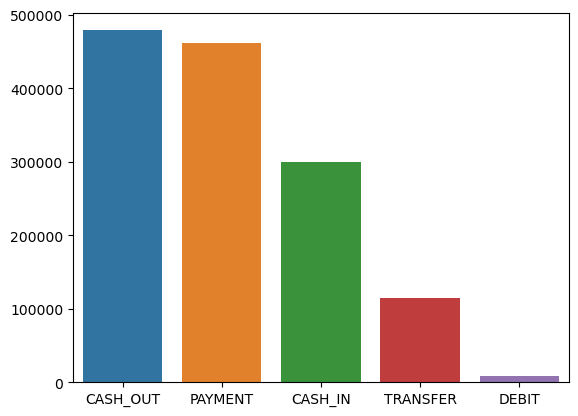

In [22]:
sns.barplot(x = data.type.value_counts().index, y = data.type.value_counts().values)


In [23]:
data["type"]= data["type"].replace({"CASH_OUT":1 ,"PAYMENT":2 , "CASH_IN":3 , "TRANSFER":4 , "DEBIT":5 })

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362620 entries, 0 to 1362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1362620 non-null  int64  
 1   type            1362620 non-null  int64  
 2   amount          1362620 non-null  float64
 3   nameOrig        1362620 non-null  object 
 4   oldbalanceOrg   1362620 non-null  float64
 5   newbalanceOrig  1362620 non-null  float64
 6   nameDest        1362620 non-null  object 
 7   oldbalanceDest  1362620 non-null  float64
 8   newbalanceDest  1362620 non-null  float64
 9   isFraud         1362620 non-null  int64  
 10  isFlaggedFraud  1362620 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 114.4+ MB


In [25]:
data.amount

0             11668.14
1              7107.77
2              9644.94
3              1157.86
4              9302.79
              ...     
1362615     1312694.50
1362616    10000000.00
1362617    10000000.00
1362618      114149.44
1362619      303846.74
Name: amount, Length: 1362620, dtype: float64

<Axes: ylabel='Frequency'>

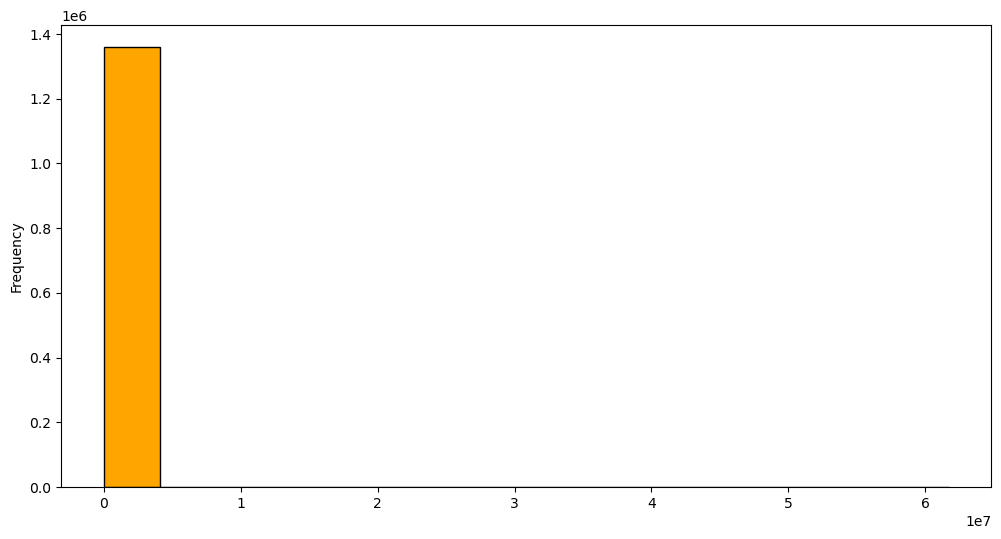

In [26]:
data.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

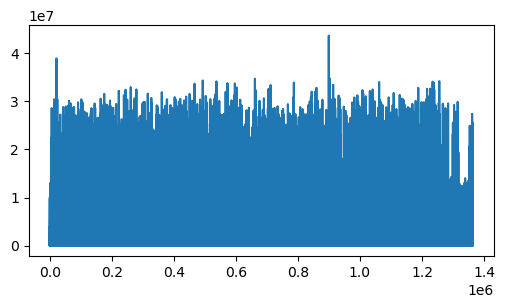

In [27]:
plt.figure(figsize = [6,3])
plt.plot(data.newbalanceOrig)
plt.show()

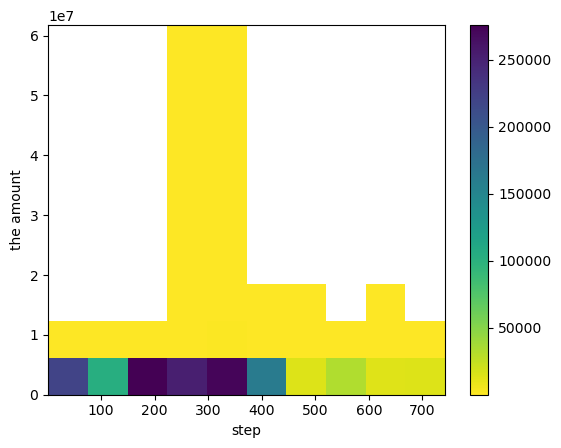

In [28]:
plt.hist2d(data= data, x = 'step', y = 'amount', cmin = 0.5,
    cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('step')
plt.ylabel('the amount')
plt.show()

In [29]:
correlation = data.corr()
print(correlation['isFraud'].sort_values(ascending=False))

/tmp/ipykernel_33/2758495956.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.000000
amount            0.075241
step              0.031582
isFlaggedFraud    0.024160
type              0.014312
oldbalanceOrg     0.008917
newbalanceDest    0.002060
oldbalanceDest   -0.004336
newbalanceOrig   -0.008825
Name: isFraud, dtype: float64


/tmp/ipykernel_33/1738594488.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

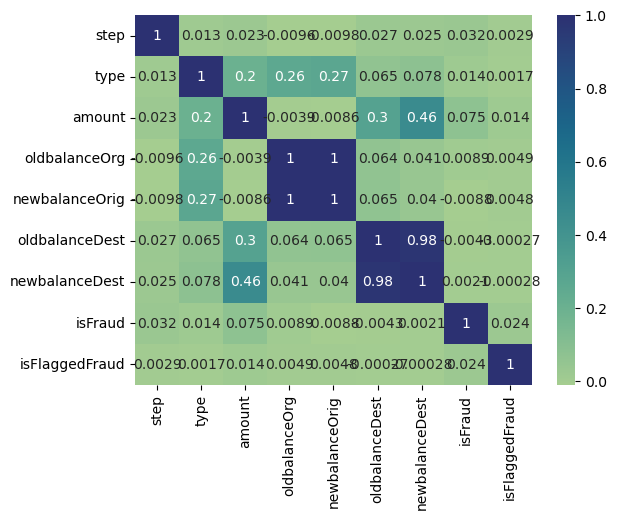

In [30]:
sns.heatmap(data.corr(), annot=True, cmap='crest')

In [31]:
data.drop(['nameDest','nameOrig','isFlaggedFraud'], axis=1 ,inplace=True)

In [32]:
#from sklearn.preprocessing import MinMaxScaler

#sc=MinMaxScaler()
#data = sc.fit_transform(data[['amount', 'oldbalanceOrg','newbalanceDest']])


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362620 entries, 0 to 1362619
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1362620 non-null  int64  
 1   type            1362620 non-null  int64  
 2   amount          1362620 non-null  float64
 3   oldbalanceOrg   1362620 non-null  float64
 4   newbalanceOrig  1362620 non-null  float64
 5   oldbalanceDest  1362620 non-null  float64
 6   newbalanceDest  1362620 non-null  float64
 7   isFraud         1362620 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 83.2 MB


In [34]:
from sklearn.model_selection import train_test_split
x= np.array(data[["step","type","amount","oldbalanceOrg","newbalanceOrig"]])
y= np.array(data[["isFraud"]])
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()

model1.fit(x_train,y_train.ravel())
model2.fit(x_train,y_train.ravel())
model3.fit(x_train,y_train.ravel())
model4.fit(x_train,y_train.ravel())


KNeighborsClassifier()

In [38]:
y_pred1=model1.predict(x_test)
y_pred2=model2.predict(x_test)
y_pred3=model3.predict(x_test)
y_pred4=model3.predict(x_test)

In [39]:
#print('DecisionTreeClassifier:' ,model1.score(x_test,y_test))   #output   0.9993468465162701
#print('LogisticRegression:' ,model2.score(x_test,y_test))       #output   0.9984331655193671
#print('RandomForestClassifier:' ,model3.score(x_test,y_test))   #output   0.9995193083911875
#print('KNeighborsClassifier:' ,model4.score(x_test,y_test))     #output   0.9994459203593078

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [41]:
confusion_matrix(y_test,y_pred1)

array([[272088,     80],
       [    97,    259]])

In [42]:
confusion_matrix(y_test,y_pred2)

array([[271942,    226],
       [   201,    155]])

In [43]:
confusion_matrix(y_test,y_pred3)

array([[272156,     12],
       [   118,    238]])

In [44]:
confusion_matrix(y_test,y_pred4)

array([[272156,     12],
       [   118,    238]])

In [45]:
accuracy_score(y_test,y_pred1)

0.9993505159178642

In [46]:
accuracy_score(y_test,y_pred2)

0.9984331655193671

In [47]:
accuracy_score(y_test,y_pred3)

0.9995229777927815

In [48]:
accuracy_score(y_test,y_pred4)

0.9995229777927815